In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import scaling_fit

# Data

In [4]:
df_theft = pd.read_csv("./data/italy/italy_theft.csv")
df_theft.dropna(inplace=True)

In [5]:
data_xy = np.array(df_theft.population.values)*1.0, np.array(df_theft.crime.values)*1.0

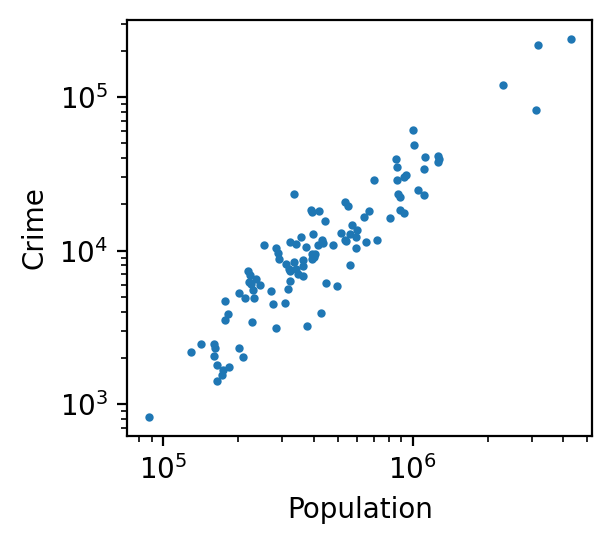

In [6]:
plt.figure(figsize=(3, 2.7))
plt.plot(*data_xy, ls="", marker='o', ms=2)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Population")
plt.ylabel("Crime");

# Model

In [7]:
required_successes = 2
df, _, _, _ = scaling_fit.fit_models(data_xy, required_successes=required_successes)

In [8]:
df

,beta,beta_ci,bic,p_value,alpha,beta_,gamma,delta
model,,,,,,,,
lognormal_delta_fixed,1.331309,0.137427,2.090247e+03,9.599789e-01,0.000349,1.331309,0.168516,2.0
lognormal_delta_fixed_beta_fixed,1.000000,0.000000,2.118405e+03,5.468698e-04,0.026284,1.0,0.235641,2.0
lognormal,1.293474,0.133376,2.093981e+03,8.057138e-01,0.000573,1.293474,3.350852,1.679164
lognormal_beta_fixed,1.000000,0.000000,2.120411e+03,9.930496e-06,0.027523,1.0,3.535706,1.712911
gaussian_delta_fixed,1.370797,0.129987,2.140162e+03,1.443909e-04,0.000198,1.370797,49.346534,0.5
gaussian_delta_fixed_beta_fixed,1.000000,0.000000,2.224209e+03,9.674646e-23,0.032584,1.0,64.331081,0.5
gaussian,1.306332,0.119232,2.115112e+03,8.999250e-08,0.000482,1.306332,1.038086,0.8977
gaussian_beta_fixed,1.000000,0.000000,2.146514e+03,5.196704e-10,0.026199,1.0,0.46319,1.0
person,1.325422,0.139205,3.183073e+07,0.000000e+00,1.325422,,,


In [9]:
scaling_law = scaling_fit.get_best_model(df)
scaling_law.model_name, scaling_law.beta

('lognormal_delta_fixed', 1.331308742358201)

Plotting

In [10]:
x = 10**np.linspace(np.log10(data_xy[0].min()*0.8), np.log10(data_xy[0].max()*1.2), 300)
y = scaling_law.mean(x)

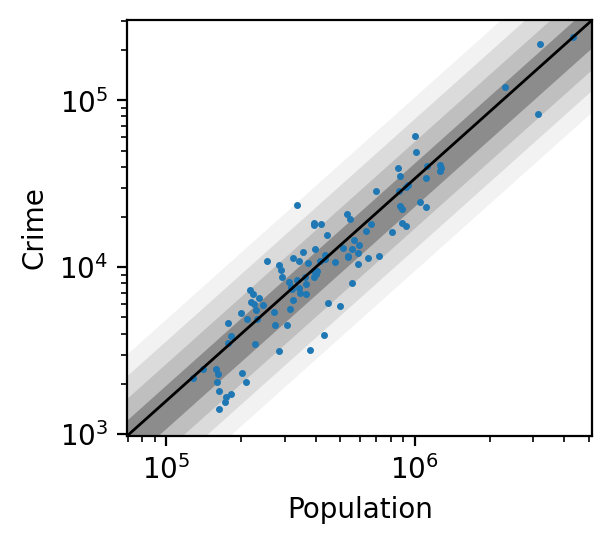

In [11]:
plt.figure(figsize=(3, 2.7))
plt.plot(*data_xy, ls="", marker='o', ms=1.5)

color = "gray"
plt.fill_between(x, *scaling_law.std(x, 2.0), color=color, alpha=0.1, linewidth=0.0)
plt.fill_between(x, *scaling_law.std(x, 1.5), color=color, alpha=0.2, linewidth=0.0)
plt.fill_between(x, *scaling_law.std(x, 1.0), color=color, alpha=0.3, linewidth=0.0)
plt.fill_between(x, *scaling_law.std(x, 0.5), color=color, alpha=0.8, linewidth=0.0)

plt.ylim(min(y), max(y))
plt.xlim(min(x), max(x))

plt.plot(x, y, color='k', lw=1)
plt.xscale('log')
plt.yscale('log')
plt.xlabel("Population")
plt.ylabel("Crime");

# ranking cities

In [12]:
df_theft = scaling_law.rank_cities(df_theft)

In [13]:
df_theft

,region,population,crime,per_capita,z_score,per_capita_ranking,adjusted_ranking
0,Novara,371686,10565.0,2842.453038,1.462659,33,29
1,Torino,2297917,120124.0,5227.516921,1.499393,4,28
2,Como,598810,13673.0,2283.362001,-0.958245,61,72
3,Lecco,340814,7530.0,2209.416280,0.029382,65,53
4,Trento,536237,11652.0,2172.919810,-1.041793,66,73
...,...,...,...,...,...,...,...
104,Pesaro e Urbino,364385,7892.0,2165.841075,-0.240793,67,61
105,Napoli,3127390,82566.0,2640.092857,-3.542719,42,94
106,Salerno,1105485,23004.0,2080.896620,-2.858749,71,90
107,Matera,201133,2333.0,1159.929002,-2.986311,96,92


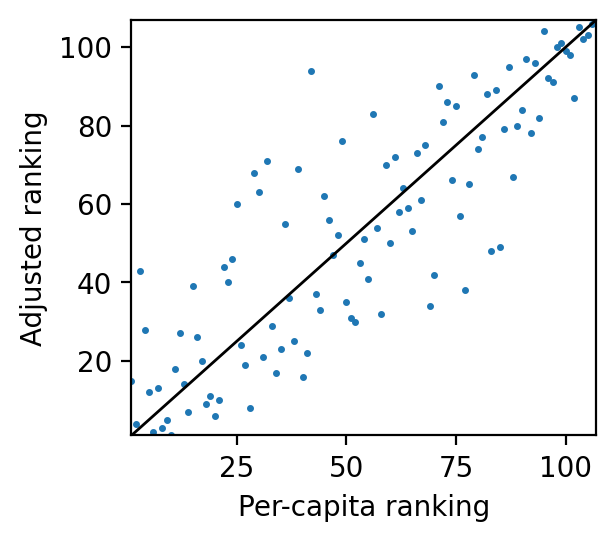

In [14]:
plt.figure(figsize=(3, 2.7))
plt.plot(df_theft.per_capita_ranking, df_theft.adjusted_ranking, ls="", marker='o', ms=1.5)
plt.plot([1, len(df_theft)], [1, len(df_theft)], color='k', lw=1)
plt.xlim(1, len(df_theft))
plt.ylim(1, len(df_theft))

plt.xlabel("Per-capita ranking")
plt.ylabel("Adjusted ranking");

In [15]:
df_theft[df_theft.per_capita_ranking < 10].sort_values("per_capita_ranking")

,region,population,crime,per_capita,z_score,per_capita_ranking,adjusted_ranking
72,Rimini,334254,23491.0,7027.888971,7.501060,0,0
83,Milano,3176180,218888.0,6891.548968,2.585363,1,15
49,Bologna,1001170,61240.0,6116.843293,4.275738,2,4
88,Roma,4321244,240124.0,5556.825766,0.548132,3,43
1,Torino,2297917,120124.0,5227.516921,1.499393,4,28
100,Firenze,1007252,49030.0,4867.699444,2.796094,5,12
37,Ravenna,392358,18350.0,4676.851243,4.544993,6,2
99,Venezia,857841,39371.0,4589.545149,2.759848,7,13
12,Lucca,394600,17811.0,4513.684744,4.304847,8,3
38,Pisa,420254,18233.0,4338.566676,3.916764,9,5


In [16]:
df_theft[df_theft.adjusted_ranking < 10].sort_values("adjusted_ranking")

,region,population,crime,per_capita,z_score,per_capita_ranking,adjusted_ranking
72,Rimini,334254,23491.0,7027.888971,7.501060,0,0
73,Prato,253245,10828.0,4275.701396,4.900571,10,1
37,Ravenna,392358,18350.0,4676.851243,4.544993,6,2
12,Lucca,394600,17811.0,4513.684744,4.304847,8,3
49,Bologna,1001170,61240.0,6116.843293,4.275738,2,4
38,Pisa,420254,18233.0,4338.566676,3.916764,9,5
81,Imperia,217703,7340.0,3371.565849,3.696801,20,6
67,Savona,283813,10320.0,3636.197073,3.617842,14,7
33,La Spezia,222377,6919.0,3111.382922,3.135924,28,8
76,Pescara,322401,11301.0,3505.262080,3.111155,18,9
